<a href="https://colab.research.google.com/github/sandipanpaul21/Machine-Learning-in-Python-Code/blob/master/03_Bivariate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BIVARIATE ANALYSIS**

- Bi means two, so Bivariate Analysis meaning two variable analysis
- Column can be of two types - 1. Continuous and 2. Categorical
- So Bivariate Analysis can be of THREE TYPES
    1. Continuous vs Continuous - Correlation Coefficient and VIF
    2. Categorical vs Categorical - Chi Square Test
    3. Categorical vs Continuous - T Test(N < 30), Z Test(N > 30) & ANOVA

In [1]:
# Libraries 
from sklearn import datasets 
import pandas as pd
import seaborn as sns
import numpy as np
from statsmodels.stats import weightstats as stests
import statsmodels.api as sm
from statsmodels.formula.api import ols 
import warnings
warnings.simplefilter('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Load the Datasets (For indepth analysis please refer to Part O1 All About Datasets)

# Iris Dataset for Classification
# Load Dataset
iris = datasets.load_iris()
# Convert to DataFrame
iris_pd = pd.DataFrame(iris.data)
# Feature Name
iris_pd.columns = iris.feature_names
# Target Variable
iris_pd["Class"] = iris.target
# iris_pd is the final dataset

# Boston Dataset for Regression
boston = datasets.load_boston()
boston_pd = pd.DataFrame(boston.data)
boston_pd.columns = boston.feature_names
boston_pd["MEDV"] = boston.target

**1.Continuous Vs Continuous - Correlation Coefficient** 

- Correlation find the exact value of strength in the relationship and the direction as well
- Range is from -1 to +1
- *+ve value suggest* they are positively correlated
- *-ve value suggest* they are negatively correlated

**Two Methods are use to calculate Correlation Coefficient**
  1. *Pearson correlation coefficient:* Assume data follows Normal Distribution and works well with linear data
  2. *Spearman correlation coefficient:* Don't assume any distribution. Works well with both linear & non-linear

By default while calculating, pearson method is used

**Correlation Coefficient Takeway :**

-  In general situation, when we have two independent variables which are very highly correlated we should remove one of them because we don't want to run into Multicollinearity issue & Regression model's regression coefficient will also become unreliable for those variables
- In short we are not adding incremental information but infusing the model with noise
- If we want to keep highly correlated variable then use PCA first which will reduce the dimensions and use Regression after that

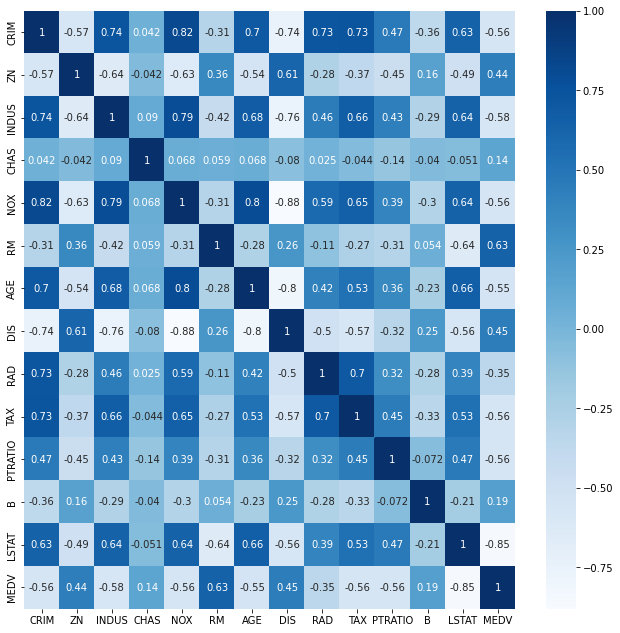

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(11,11)) # Sample figsize in inches, change the number accordingly
sns.heatmap(boston_pd.corr(method = 'spearman'), annot= True, cmap = 'Blues',ax = ax)

# MEDV and LSTAT is having -0.85, we might need to remove one variable

**Variance Inflation Factors (VIFs)**
- It measure the correlation among independent variables in least squares regression models. Statisticians refer to this type of correlation as multicollinearity. Excessive multicollinearity can cause problems for regression models.

**Why Use VIFs Rather Than Pairwise Correlations?**

- Multicollinearity is correlation amongst the independent variables. 
- Consequently, it seems logical to assess the pairwise correlation between all independent variables (IVs) in the model. 
- That is one possible method. However, imagine a scenario where you have four IVs, and the pairwise correlations between each pair are not high, say around 0.6. No problem, right?
- Unfortunately, you might still have problematic levels of collinearity. 
- While the correlations between IV pairs are not exceptionally high, it’s possible that three IVs together could explain a very high proportion of the variance in the fourth IV.

**Calculating Variance Inflation Factors**
- VIFs use multiple regression to calculate the degree of multicollinearity. 
- Imagine you have four independent variables: X1, X2, X3, and X4. 
- Of course, the model has a dependent variable (Y), but we don’t need to worry about it for our purposes. - When your statistical software calculates VIFs, it uses multiple regression to regress all IVs except one on that final IV. It repeats this process for all IVs, as shown below:

  X1 ⇐ X2, X3, X4

  X2 ⇐ X1, X3, X4

  X3 ⇐ X1, X2, X4

  X4 ⇐ X1, X2, X3

- To calculate the VIFs, all independent variables become a dependent variable. 
- Each model produces an R-squared value indicating the percentage of the variance in the individual IV that the set of IVs explains. 
- Consequently, higher R-squared values indicate higher degrees of multicollinearity. 
- VIF calculations use these R-squared values. 
- The VIF for an independent variable equals the following: **VIF = 1 / (1 - R^2)** for each i of R^2

- Where the subscript i indicates the independent variable. There is a VIF for each IV.
- When R-squared equals zero, there is no multicollinearity because the set of IVs does not explain any of the variability in the remaining IV. 
- Take a look at the equation and notice that when R-squared equals 0, both the numerator and denominator equal 1, producing a VIF of 1. This is the lowest possible VIF and it indicates absolutely no multicollinearity.
- As R-squared increases, the denominator decreases, causing the VIFs to increase. In other words, as the set of IVs explains more of the variance in the individual IV, it indicates higher multicollinearity and the VIFs increase from 1.

**How to Interpret VIF Values**

The value for VIF starts at 1 and has no upper limit. A general rule of thumb for interpreting VIFs is as follows:

1. *A value of 1 indicates* there is no correlation between a given explanatory variable and any other explanatory variables in the model.
2. *A value between 1 and 5 indicates* moderate correlation between a given explanatory variable and other explanatory variables in the model, but this is often not severe enough to require attention.
3. *A value greater than 5 indicates* potentially severe correlation between a given explanatory variable and other explanatory variables in the model. In this case, the coefficient estimates and p-values in the regression output are likely unreliable.



In [3]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

# Remove Dependent Column first and then apply VIF
X = boston_pd.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,CRIM,2.100373
1,ZN,2.844013
2,INDUS,14.485758
3,CHAS,1.152952
4,NOX,73.894947
5,RM,77.948283
6,AGE,21.386850
7,DIS,14.699652
8,RAD,15.167725
9,TAX,61.227274


**2. Categorical vs Categorical - Chi Square Test**

- Chi Square test determines the association between categorical variables. It is commonly used for testing relationships between categorical variables.  
- The null hypothesis of the Chi-Square test is that no relationship exists on the categorical variables in the population; they are independent. 

**How does the Chi-Square statistic work?**

The Chi-Square statistic is most commonly used to evaluate Tests of Independence when using a crosstabulation (also known as a bivariate table).
  1. Crosstabulation presents the distributions of two categorical variables simultaneously, with the intersections of the categories of the variables appearing in the cells of the table.  
  2. The Test of Independence assesses whether an association exists between the two variables by comparing the observed pattern of responses in the cells to the pattern that would be expected if the variables were truly independent of each other.  
  3. Calculating the Chi-Square statistic and comparing it against a critical value from the 

Chi-Square distribution assess whether the observed cell counts are significantly different from the expected cell counts.
  1. Value = 0, shows complete dependency between two categorical variables
  2. Value = 1, shows categorical variables are completely independent



In [ ]:
iris_pd.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
# Datatypes
print("Datatypes of IRIS Dataset")
iris_pd.dtypes

Datatypes of IRIS Dataset


sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
Class                  int64
dtype: object

In [ ]:
# So as we can observe all are continuous variable
# First we need to create categorical variables

# For this we will choose two variables. They are "Class" and "petal width (cm)".
# So we will create two bins name 'LOW' and 'HIGH'
# 'LOW' means value less than Median and 'HIGH' means value more than Median
# For this we will choose one column i.e, 'petal width (cm)'

iris_pd['petal width (cm)'].describe()

count    150.000000
mean       1.199333
std        0.762238
min        0.100000
25%        0.300000
50%        1.300000
75%        1.800000
max        2.500000
Name: petal width (cm), dtype: float64

In [ ]:
# So Median is 1.3
bin_label = ['LOW','HIGH']
iris_pd['Bin_Petal_Width'] = pd.qcut(iris_pd['petal width (cm)'],q=[0,0.5,1],labels=bin_label)
iris_pd.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class,Bin_Petal_Width
0,5.1,3.5,1.4,0.2,0,LOW
1,4.9,3.0,1.4,0.2,0,LOW
2,4.7,3.2,1.3,0.2,0,LOW
3,4.6,3.1,1.5,0.2,0,LOW
4,5.0,3.6,1.4,0.2,0,LOW


In [ ]:
# Frequency Count
iris_pd['Bin_Petal_Width'].value_counts()

LOW     78
HIGH    72
Name: Bin_Petal_Width, dtype: int64

In [ ]:
# Convert Target Column to Categorical
iris_pd['Class'] = iris_pd['Class'].astype('category')
# So Datatype is
print("FINAL DATATYPES ")
iris_pd.dtypes

FINAL DATATYPES 


sepal length (cm)     float64
sepal width (cm)      float64
petal length (cm)     float64
petal width (cm)      float64
Class                category
Bin_Petal_Width      category
dtype: object

In [ ]:
# Now we can check Interaction Effect between Class and Bin_Petal_Width through Chi Square Test
# First Create Contigency Table
contingency_table = pd.crosstab(iris_pd['Bin_Petal_Width'],iris_pd['Class'])
print(contingency_table)

Class             0   1   2
Bin_Petal_Width            
LOW              50  28   0
HIGH              0  22  50


In [ ]:
# Chi Square Test
# So we took two categorical columns - Petal Width(Bins) and Class

# Chi Square Hypothesis :
# Null hypothesis - Petal Width (Bins) has no affect on Class
# Alternate hypothesis - Petal Width (Bins) has some affect on Class

# Chi Square Test
from scipy import stats
chi2_stat,p_val,dof,ex = stats.chi2_contingency(contingency_table)
print("CHI-SQUARE TEST VALUES")
print("Chi Square Value : ",chi2_stat)
print("Degree of Freedom : ",dof)
print("P Value : ", p_val)
print("Contigency Table")
ex

# Inference :
# P-Value is 1.339^-22 which is quite smaller than threshold value of 5%(95% Confidence)
# This enable us to REJECT NULL HYPOTHESIS and ACCEPT ALTERNATE HYPOTHESIS
# In other word, Petal Width(Bins) has impact on Class
# And we can also say Petal Width(Bins) is a good predictor for Class

CHI-SQUARE TEST VALUES
Chi Square Value :  100.64102564102565
Degree of Freedom :  2
P Value :  1.3998417931687032e-22
Contigency Table


array([[26., 26., 26.],
       [24., 24., 24.]])

**T TEST**
- A t-test is a type of inferential statistic used to determine if there is a significant difference between the means of two groups, which may be related in certain features.
- The t-test is one of many tests used for the purpose of hypothesis testing in statistics.
- Calculating a t-test requires three key data values. They include the difference between the mean values from each data set (called the mean difference), the standard deviation of each group, and the number of data values of each group.
- Example, 
  - t-test allows us to compare the average values of the two data sets and determine if they came from the same population. 
  - In the examples, if we were to take a sample of students from class A and another sample of students from class B, we would not expect them to have exactly the same mean and standard deviation. 
- Mathematically, the t-test takes a sample from each of the two sets and establishes the problem statement by assuming a null hypothesis that the two means are equal. Based on the applicable formulas, certain values are calculated and compared against the standard values, and the assumed null hypothesis is accepted or rejected accordingly.
- Another example,
  - Consider that a drug manufacturer wants to test a newly invented medicine. 
  - It follows the standard procedure of trying the drug on one group of patients and giving a placebo to another group, called the control group. 
  - The placebo given to the control group is a substance of no intended therapeutic value and serves as a benchmark to measure how the other group, which is given the actual drug, responds.
  - After the drug trial, the members of the placebo-fed control group reported an increase in average life expectancy of three years, while the members of the group who are prescribed the new drug report an increase in average life expectancy of four years. 
  - Instant observation may indicate that the drug is indeed working as the results are better for the group using the drug. 
  - However, it is also possible that the observation may be due to a chance occurrence, especially a surprising piece of luck. 
  - A t-test is useful to conclude if the results are actually correct and applicable to the entire population.

**T-Test Assumptions**
  1. The first assumption made regarding t-tests concerns the scale of measurement. The assumption for a t-test is that the scale of measurement applied to the data collected follows a continuous or ordinal scale.
  2. The second assumption made is that of a simple random sample, that the data is collected from a representative, randomly selected portion of the total population.
  3. The third assumption is the data, when plotted, results in a normal distribution, bell-shaped distribution curve.
  4. The final assumption is the homogeneity of variance. Homogeneous, or equal, variance exists when the standard deviations of samples are approximately equal.

**Z TEST**
- A z-test is a statistical test to determine whether two population means are different when the variances are known and the sample size is large.
- A z-test is a hypothesis test in which the z-statistic follows a normal distribution. 
- A z-statistic, or z-score, is a number representing the result from the z-test.
- Z-tests are closely related to t-tests, but t-tests are best performed when an experiment has a small sample size.

**What's the Difference Between a T-Test and Z-Test?**

- Z-tests are closely related to t-tests, but t-tests are best performed when an experiment has a small sample size, less than 30. 
- Also, t-tests assume the standard deviation is unknown, while z-tests assume it is known. 
- If the standard deviation of the population is unknown, but the sample size is greater than or equal to 30, then the assumption of the sample variance equaling the population variance is made while using the z-test.

**ANOVA**


**One-Way ANOVA Versus Two-Way ANOVA**
- There are two main types of ANOVA: one-way (or unidirectional) and two-way. There also variations of ANOVA. 
- For example, MANOVA (multivariate ANOVA) differs from ANOVA as the former tests for multiple dependent variables simultaneously while the latter assesses only one dependent variable at a time. 
- One-way or two-way refers to the number of independent variables in your analysis of variance test. 
- A one-way ANOVA
  - It evaluates the impact of a sole factor on a sole response variable. 
  - It determines whether all the samples are the same. 
  - The one-way ANOVA is used to determine whether there are any statistically significant differences between the means of three or more independent (unrelated) groups.
- A two-way ANOVA 
  - It is an extension of the one-way ANOVA. With a one-way, you have one independent variable affecting a dependent variable. 
  - With a two-way ANOVA, there are two independents.
  - For example, a two-way ANOVA allows a company to compare worker productivity based on two independent variables, such as salary and skill set. It is utilized to observe the interaction between the two factors and tests the effect of two factors at the same time.

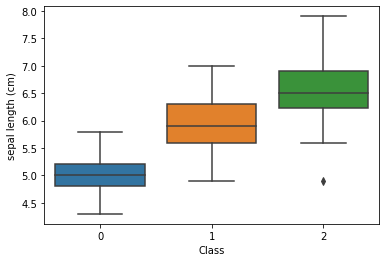

In [ ]:
# 3) Categorical and Numerical Columns - T Test, Z Test and ANOVA

# Z Test(n > 30), T Test(n < 30) and ANNOVA
# Z Test and T Test are basically same
# They assess whether the average of two groups are statistically different from each other
# This analysis is appropiate from comparing the average of a numerical variables 
# for two categories of a categorical variable

# If the probability of Z is small, difference between two average is more significant 
# T Test is used when n =< 30, we use Z Test when n > 30 and n is Number of samples
# Continuous Column to do analysis - Sepal Length (cm)
# Categorical Column to do analysis - Class

# Null Hypothesis : 
  # Sepal Length has NO AFFECT on Class
  # There is no statistically difference between Speal Length values for Various Class

# Alternate Hypothesis :
  # Sepal Length has SOME AFFECT on Class
  # There is difference between Observed Sepal Length values for Various Class

# Lets plot the boxplot
sns.boxplot(x = 'Class', y = 'sepal length (cm)', data = iris_pd)

In [ ]:
# Use Z Test
print("Number of samples in the set : ",len(iris_pd))
print("Therefore USE Z TEST")

ztest, pval = stests.ztest(iris_pd['Class'],iris_pd['sepal length (cm)'],alternative='two-sided')
print("Z Test Value is ",ztest)
print("P Value is ",pval)

# Inference :
# P Value is less than 0.05 so REJECT NULL HYPOTHESIS
# In other word, Sepal Length can be a good predictor for Class

Number of samples in the set :  150
Therefore USE Z TEST
Z Test Value is  -50.92447470978208
P Value is  0.0


In [ ]:
# ANOVA Test
# T or Z test works while dealing with two groups
# ANOVA help us to compare more than two groups at the same time
# If we use t-test then we need to carry out seperate t-test for each pair of group
# In short ANOVA help us to compare multiple group at the same time 

# Considering two Categorical columns for the analysis i.e, bins (Sepal Width & Petal Width)
# For Petal Width, Binning is already done
# For Sepal Width,
iris_pd['Bin_Sepal_Width'] = pd.qcut(iris_pd['sepal width (cm)'],q=[0,0.5,1],labels = bin_label)
# Remove the space and other symbols in Column name to use in a model
iris_pd.columns = iris_pd.columns.str.replace(' ','')
iris_pd.columns = iris_pd.columns.str.replace('(cm)','')
iris_pd.columns = iris_pd.columns.str.replace('[^a-zA-z]','')

iris_pd['Class'] = iris_pd['Class'].astype('int')

# Building Regression model
model = ols('Class ~ C(Bin_Petal_Width) *C(Bin_Sepal_Width)',iris_pd).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Class   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     177.8
Date:                Fri, 31 Jul 2020   Prob (F-statistic):           1.55e-48
Time:                        12:44:41   Log-Likelihood:                -67.119
No. Observations:                 150   AIC:                             142.2
Df Residuals:                     146   BIC:                             154.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                                 0.7778      0.064     12.163      0.000       0.651       0.904
C(Bin_Petal_Width)[T.HIGH]                                0.9243      0.085     10.878      0.000       0.756       1.092
C(Bin_Sepal_Width)[T.HIGH]                               -0.7778      0.087     -8.925      0.000      -0.950      -0.606
C(Bin_Petal_Width)[T.HIGH]:C(Bin_Sepal_Width)[T.HIGH]     0.7557      0.129      5.862      0.000       0.501       1.010
==============================================================================
Omnibus:                       25.008   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.614
Skew:                          -1.154   Prob(JB):                     5.02e-08
Kurtosis:                       2.776   Cond. No.                         6.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Anova Output
sm.stats.anova_lm(model,typ = 2) # Type = 2 because of two independent columns
# F = Between Group Variability / Within Group Variability

# Inference : 
# P Value is less than 0.05, so we REJECT NULL HYPOTHESIS
# Therefore we can say Bins in the Petal Width and Sepal Width on Class is statistically significant

,sum_sq,df,F,PR(>F)
C(Bin_Petal_Width),56.590258,1.0,384.430208,9.721071e-43
C(Bin_Sepal_Width),6.675232,1.0,45.346339,3.528236e-10
C(Bin_Petal_Width):C(Bin_Sepal_Width),5.059254,1.0,34.368636,2.919685e-08
Residual,21.492009,146.0,NaN,NaN
